# Training a Neural Network

In this notebook I demonstrate how to train the neural network known as the **multilayer perceptron (MLP)**. We will use a MLP to classify the iris dataset and also a dataset of handwritten digits, in order to detect different characters.

Neural networks have a lot of parameters to set when training. These include:

* How many hidden layers to have
* How many neurons to include in each layer
* The activation functions of neurons in the hidden layers
* Value of the regularization term to control overfitting (referred to as $\alpha$)

Issues when training a neural network are also accute. These are choices related to the actual optimization algorithm that estimates the parameters used for prediction. For neural networks this fitting process is very involved.

MLPs are online algorithms just like perceptrons. This is especially advantageous for training on large datasets that don't necessarily fit into data. Additionally, MLPs are *not* linear classifiers/regressors. This suggests that MLPs are most popular for learning problems that require fitting data that isn't linearly separable.

MLPs can be used for classification and regression. This notebook focuses on classification.

First, lets load in the datasets we will use.

In [1]:
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# First, the iris dataset
iris_obj = load_iris()
iris_data_train, iris_data_test, species_train, species_test = train_test_split(iris_obj.data, iris_obj.target)

# Next, the digits dataset
digits_obj = load_digits()
print(digits_obj.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [3]:
digits_obj.data.shape

(1797, 64)

In [4]:
digits_data_train, digits_data_test, number_train, number_test = train_test_split(digits_obj.data, digits_obj.target)
number_train[:5]

array([6, 9, 3, 5, 6])

In [5]:
digits_data_train[0, :]

array([  0.,   0.,   0.,   6.,  12.,   0.,   0.,   0.,   0.,   0.,   0.,
        13.,  13.,   0.,   0.,   0.,   0.,   0.,   7.,  16.,   2.,   0.,
         0.,   0.,   0.,   0.,  10.,  12.,   0.,   2.,   0.,   0.,   0.,
         0.,  13.,  14.,  16.,  14.,   0.,   0.,   0.,   0.,  11.,  16.,
        14.,  13.,   6.,   0.,   0.,   0.,   5.,  13.,   9.,  16.,   5.,
         0.,   0.,   0.,   0.,   6.,  15.,  12.,   1.,   0.])

In [6]:
digits_data_train[0, :].reshape((8, 8))

array([[  0.,   0.,   0.,   6.,  12.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  13.,  13.,   0.,   0.,   0.],
       [  0.,   0.,   7.,  16.,   2.,   0.,   0.,   0.],
       [  0.,   0.,  10.,  12.,   0.,   2.,   0.,   0.],
       [  0.,   0.,  13.,  14.,  16.,  14.,   0.,   0.],
       [  0.,   0.,  11.,  16.,  14.,  13.,   6.,   0.],
       [  0.,   0.,   5.,  13.,   9.,  16.,   5.,   0.],
       [  0.,   0.,   0.,   6.,  15.,  12.,   1.,   0.]])

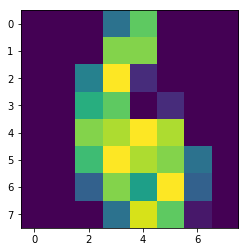

In [7]:
plt.imshow(digits_data_train[0, :].reshape((8, 8)))

## Fitting a MLP to the Iris Data

MLP models are implemented via the `MLPClassifier` object in **scikit-learn**. The MLP classifier I train:

* Has one hidden layer with 20 neurons
* Uses the logistic activation function for the hidden layers
* Uses a regularization parameter of $\alpha = 1$

I demonstrate its use below.

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [9]:
mlp_iris = MLPClassifier(hidden_layer_sizes=(20,),    # A tuple with the number of neurons for each hidden layer
                         activation='logistic',         # Which activation function to use
                         alpha=1,                       # Regularization parameter
                         max_iter=1000)                 # Maximum number of iterations taken by the solver
mlp_iris = mlp_iris.fit(iris_data_train, species_train)
mlp_iris.predict(iris_data_train[:1,:])

array([2])

In [10]:
species_pred_train = mlp_iris.predict(iris_data_train)
accuracy_score(species_pred_train, species_train)

0.9821428571428571

In [11]:
species_pred_test = mlp_iris.predict(iris_data_test)
accuracy_score(species_pred_test, species_test)

0.97368421052631582

The classifier has extremely high accuracy for this dataset.

## Fitting an MLP to the Digits Dataset

Let's now see how the MLP classifier performs for the digits dataset. Again there is only one hidden layer, this one with 50 neurons.

In [12]:
mlp_digits = MLPClassifier(hidden_layer_sizes=(50,),
                           activation='logistic',
                           alpha=1)
mlp_digits = mlp_digits.fit(digits_data_train, number_train)

In [13]:
mlp_digits.predict(digits_data_train[[0], :])

array([6])

In [14]:
number_pred_train = mlp_digits.predict(digits_data_train)
accuracy_score(number_pred_train, number_train)

0.99777282850779514

In [15]:
number_pred_test = mlp_digits.predict(digits_data_test)
accuracy_score(number_pred_test, number_test)

0.98222222222222222

The classifier shines in these nonlinear contexts.